<a href="https://colab.research.google.com/github/sheinviktoriia/Data-analyst-home-works-/blob/main/Final_Project_Grocery_store_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau!
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openpyxl

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from scipy.stats import norm

Ось так можемо переглянути, які є листки в Excel файлі:

In [2]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '/content/drive/MyDrive/Grocery Database.xlsx'

In [5]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [6]:
descr = xl.parse('Fact Summary')

In [8]:
descr

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [7]:
df = pd.read_excel(path_to_file)

In [9]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [10]:
data = xl.parse('Grosto DB')

In [12]:
data.isnull().values.any()

False

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

In [13]:
def camel_to_snake(name):
  name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
  return name.lower()

In [14]:
data.columns = data.columns.str.strip().str.replace(' ', '_', regex=False).map(
    camel_to_snake)

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
data.head(2)

,receipt_number,date,year,month,time,mobile_number,membership_id,loyalty_card_points,age,gender,city,country,category,sub_category,items,brand,description,price,qty,disc,amount,net_bill_amount,gst,gross_bill_amount,payment_mode,bank_name,%_profit_margin,%_operating_cost,%_product_cost,profit_margin,operating_cost,product_cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.8540,1.854,8.6520
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.7376,3.480,16.9824


Time column displays microseconds which are not useful for analytics, therefore I will replace fractional seconds with 0

In [17]:
data.time = data.time.apply(lambda t: t.replace(microsecond=0))

For correct calculations, comparisons and clear analysis I will consistently format numerical values.

In [18]:
floating_limit = data[['amount', 'net_bill_amount', 'gross_bill_amount'
, 'profit_margin', 'operating_cost', 'product_cost']]

In [19]:
data[['amount', 'net_bill_amount', 'gross_bill_amount'
, 'profit_margin', 'operating_cost', 'product_cost']] = floating_limit.apply(
    lambda x: round(x, 3))

1. What %invoice for each city

In [20]:
data.city.value_counts(normalize = True)

,proportion
city,
Manila,0.245406
Bedok,0.243265
Kuala Lumpur,0.213353
Jakarta,0.180546
Woodlands,0.117430


2.What is average profit margin for each city and its %

In [21]:
average_profit_margin_pct = data.groupby('city')['%_profit_margin'].mean().round(3)
average_profit_margin_pct

,%_profit_margin
city,
Bedok,0.106
Jakarta,0.105
Kuala Lumpur,0.105
Manila,0.106
Woodlands,0.106


In [22]:
average_profit_margin = data.groupby('city')['profit_margin'].mean().round(3)
average_profit_margin

,profit_margin
city,
Bedok,1.194
Jakarta,1.215
Kuala Lumpur,1.204
Manila,1.168
Woodlands,1.264


3. What category has biggest profit

In [23]:
category_profit = data.groupby(
    'category')['%_profit_margin'].max().sort_values(ascending=False)
category_profit

,%_profit_margin
category,
Beverages,0.150
"Choco, Snacks, Sweets",0.150
Frozen,0.150
Bakery & Breakfast,0.148
Pet Care,0.148
Fruit & Vegetable,0.147
Meat & Seafood,0.138
Mother & Baby,0.138
"Dairy, Chilled & Eggs",0.133


4. TOP 10 most popular brands.

In [24]:
top_brands = data.groupby('brand')['qty'].sum().nlargest(10).index

In [25]:
top_brands

Index(['Biogreen', 'BonJour', 'RedMart', 'Sainbury', 'Liang Teck', 'ThyGrace',
       'Ashai', 'Anchor', 'Nature's Gift', 'Alpo'],
      dtype='object', name='brand')

5. What is the most usable bank for each city

In [26]:
txn_count_by_bank = data.groupby(['city', 'bank_name']
                                 )['receipt_number'].count().reset_index()

In [27]:
top_city_banks = txn_count_by_bank.loc[txn_count_by_bank.groupby('city'
                                      )['receipt_number'].idxmax()]
top_city_banks

,city,bank_name,receipt_number
3,Bedok,BDO Unibank,2813
13,Jakarta,BDO Unibank,2249
18,Kuala Lumpur,BDO Unibank,2276
26,Manila,Philippine National bank,2749
31,Woodlands,BDO Unibank,1307


In [28]:
crosstab = pd.crosstab(index=data['city'], columns=data['bank_name'])

In [29]:
city_to_check = 'Manila'
bank_to_check = 'BDO Unibank'

In [30]:
if crosstab.loc[city_to_check, bank_to_check] > 0:
    print(f'{bank_to_check} is used in {city_to_check}')
else:
    print('No')

BDO Unibank is used in Manila


6. %of banks used

In [31]:
total_customers_per_city = data.groupby('city')['mobile_number'].nunique()

In [33]:
customers_using_bank_per_city = data.groupby(['city', 'bank_name'])[
    'mobile_number'].nunique().unstack(fill_value=0)

In [34]:
percentage_per_city = (customers_using_bank_per_city.div(
    total_customers_per_city, axis=0) * 100).round(3)

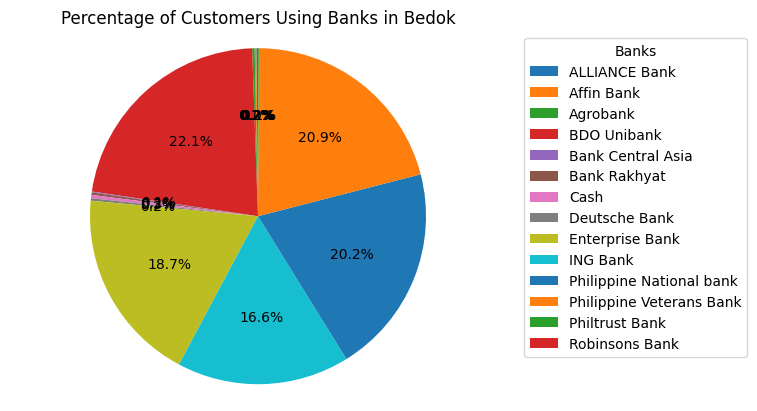

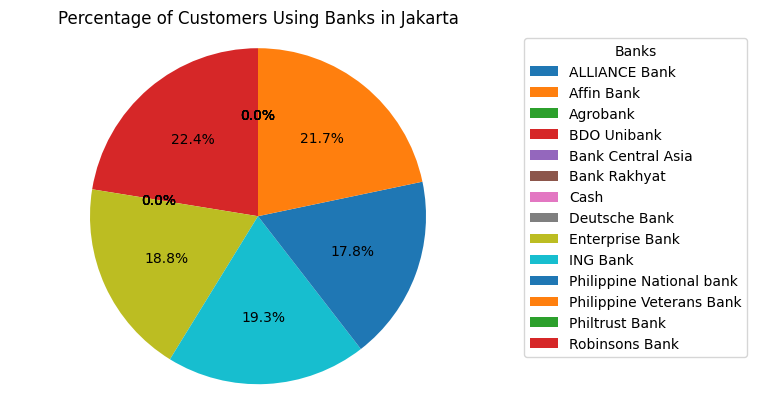

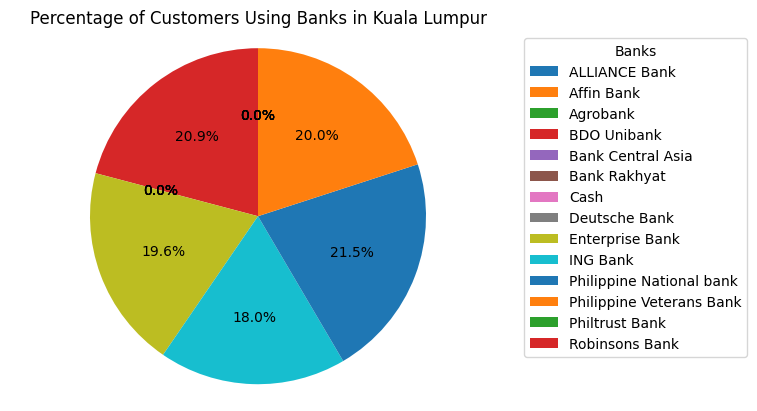

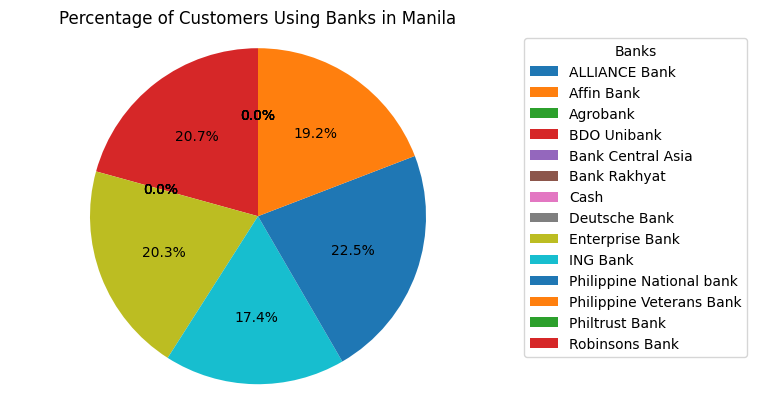

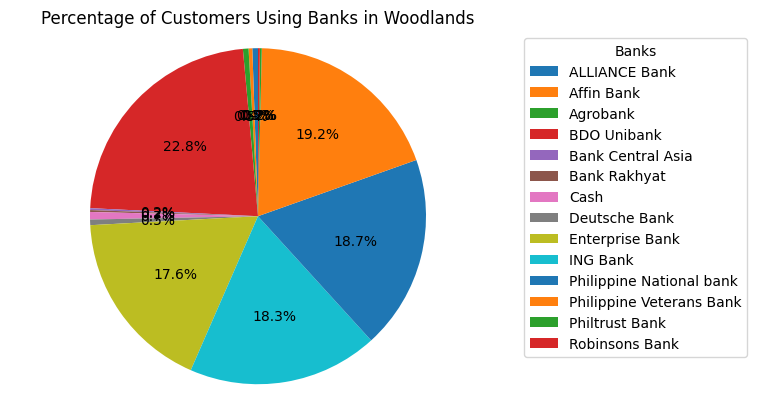

In [35]:
for city in percentage_per_city.index:

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(percentage_per_city.loc[city]
                                      , autopct='%1.1f%%', startangle=90)

    ax.legend(wedges, percentage_per_city.columns, title="Banks", loc="best"
    , bbox_to_anchor=(1, 0, 0.5, 1))

    ax.axis('equal')

    plt.title(f'Percentage of Customers Using Banks in {city}')
    plt.show();

7. How do customer demographics correlate with product categories purchased

In [36]:
demographic_data = data.groupby(['gender', 'city', 'category']
                                ).size().reset_index(name='purchase_count')


In [37]:
pivot_gender = demographic_data.pivot_table(index='gender', columns='category'
, values='purchase_count', fill_value=0)
pivot_city = demographic_data.pivot_table(index='city', columns='category'
, values='purchase_count', fill_value=0)

In [38]:
display(pivot_gender, pivot_city)

category,Bakery & Breakfast,Beauty,Beverages,"Choco, Snacks, Sweets","Dairy, Chilled & Eggs",Frozen,Fruit & Vegetable,Health,Household,Kitchen & Dining,Meat & Seafood,Mother & Baby,Party Supplies,Pet Care,Rice & Cooking Essentials,"Wines, Beers & Spirits"
gender,,,,,,,,,,,,,,,,
Female,1119.2,861.8,362.6,494.4,561.6,1080.2,727.6,169.4,307.2,419.8,359.4,345.4,308.2,570.0,393.2,284.4
Male,234.8,179.2,79.0,109.4,114.6,198.4,146.4,32.2,69.0,90.6,70.4,67.4,59.0,123.0,93.2,58.4


category,Bakery & Breakfast,Beauty,Beverages,"Choco, Snacks, Sweets","Dairy, Chilled & Eggs",Frozen,Fruit & Vegetable,Health,Household,Kitchen & Dining,Meat & Seafood,Mother & Baby,Party Supplies,Pet Care,Rice & Cooking Essentials,"Wines, Beers & Spirits"
city,,,,,,,,,,,,,,,,
Bedok,839.0,608.0,265.5,375.0,402.0,717.5,611.0,118.5,215.5,317.5,244.5,253.5,238.0,446.5,275.5,208.5
Jakarta,604.0,472.0,200.5,266.5,303.5,624.5,376.0,88.5,166.5,224.0,188.5,185.0,146.0,317.5,225.5,165.5
Kuala Lumpur,740.0,581.0,232.5,325.0,375.5,675.5,452.0,107.0,204.5,271.5,252.0,209.0,151.0,349.0,268.0,188.0
Manila,819.0,637.0,268.5,368.5,401.0,773.5,495.0,124.5,234.5,315.5,253.0,264.5,289.0,430.5,309.0,207.0
Woodlands,383.0,304.5,137.0,174.5,208.5,405.5,251.0,65.5,119.5,147.5,136.5,120.0,94.0,189.0,138.0,88.0


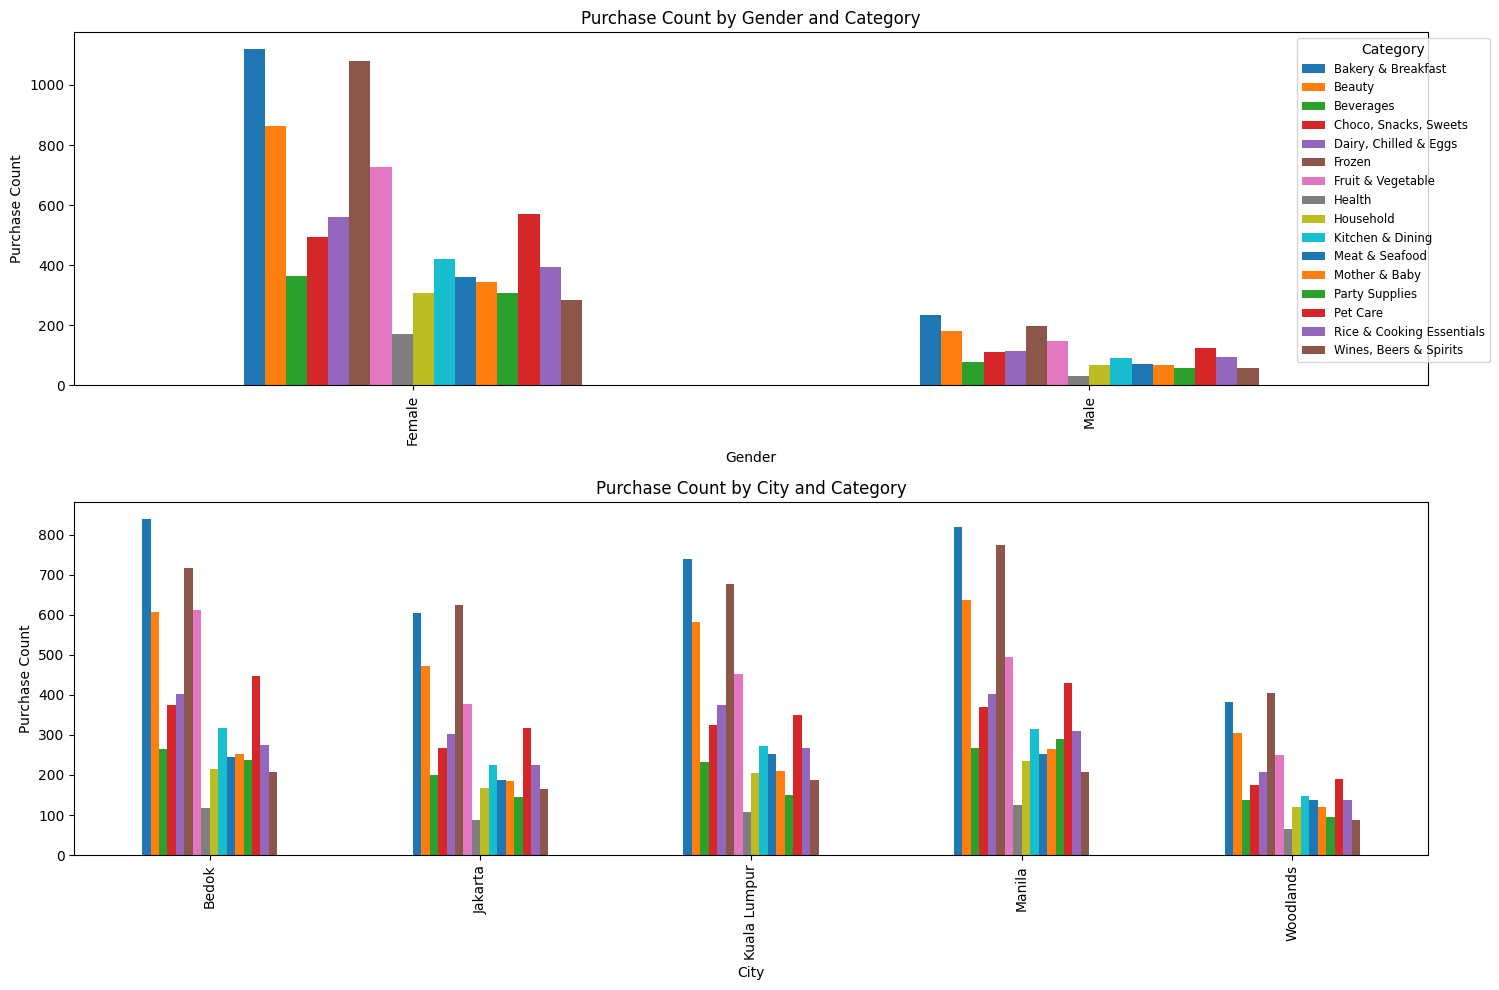

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

pivot_gender.plot(
    kind='bar', ax=axes[0], title='Purchase Count by Gender and Category')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Purchase Count')
axes[0].legend(title='Category', bbox_to_anchor=(1.05, 1)
, loc='upper right', fontsize='small')

pivot_city.plot(
    kind='bar', ax=axes[1], title='Purchase Count by City and Category')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Purchase Count')
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.show();

8. How do customer age correlate with membership

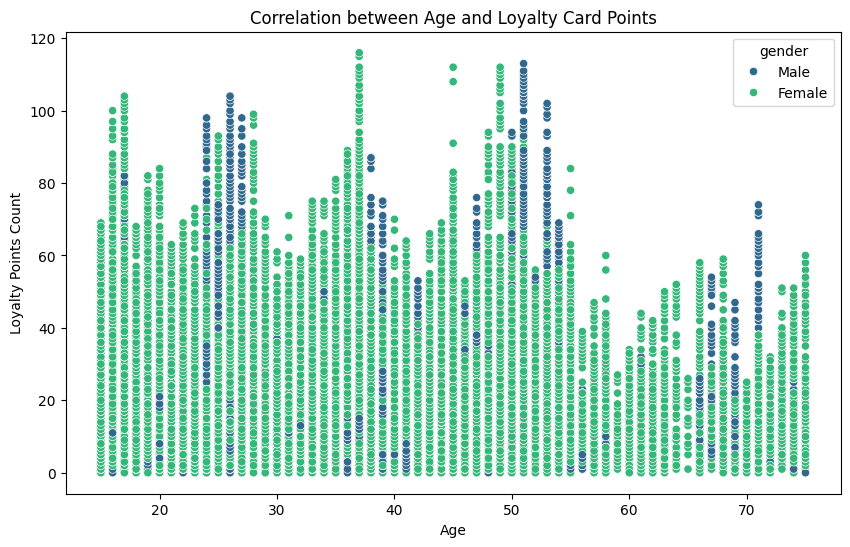

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='loyalty_card_points', data=data[
    ['age', 'loyalty_card_points', 'gender']], hue='gender', palette='viridis')

plt.title('Correlation between Age and Loyalty Card Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points Count')

plt.show();

What is % memebership

In [41]:
data[['membership_id', 'mobile_number']].nunique()

,0
membership_id,2601
mobile_number,2601


9. What time are the most purchase made?

In [42]:
def time_to_block(time):
    hour = time.hour
    if 0 <= hour < 6:
        return '00:00-06:00'
    elif 6 <= hour < 12:
        return '06:00-12:00'
    elif 12 <= hour < 14:
        return '12:00-14:00'
    elif 14 <= hour < 16:
        return '14:00-16:00'
    elif 16 <= hour < 18:
        return '16:00-18:00'
    elif 18 <= hour < 20:
        return '18:00-20:00'
    elif 20 <= hour < 22:
        return '20:00-22:00'
    else:
        return '22:00-24:00'

In [43]:
data['time_block'] = data['time'].apply(time_to_block)

In [44]:
invoice_counts = data.groupby(
    'time_block')['receipt_number'].nunique().reset_index()

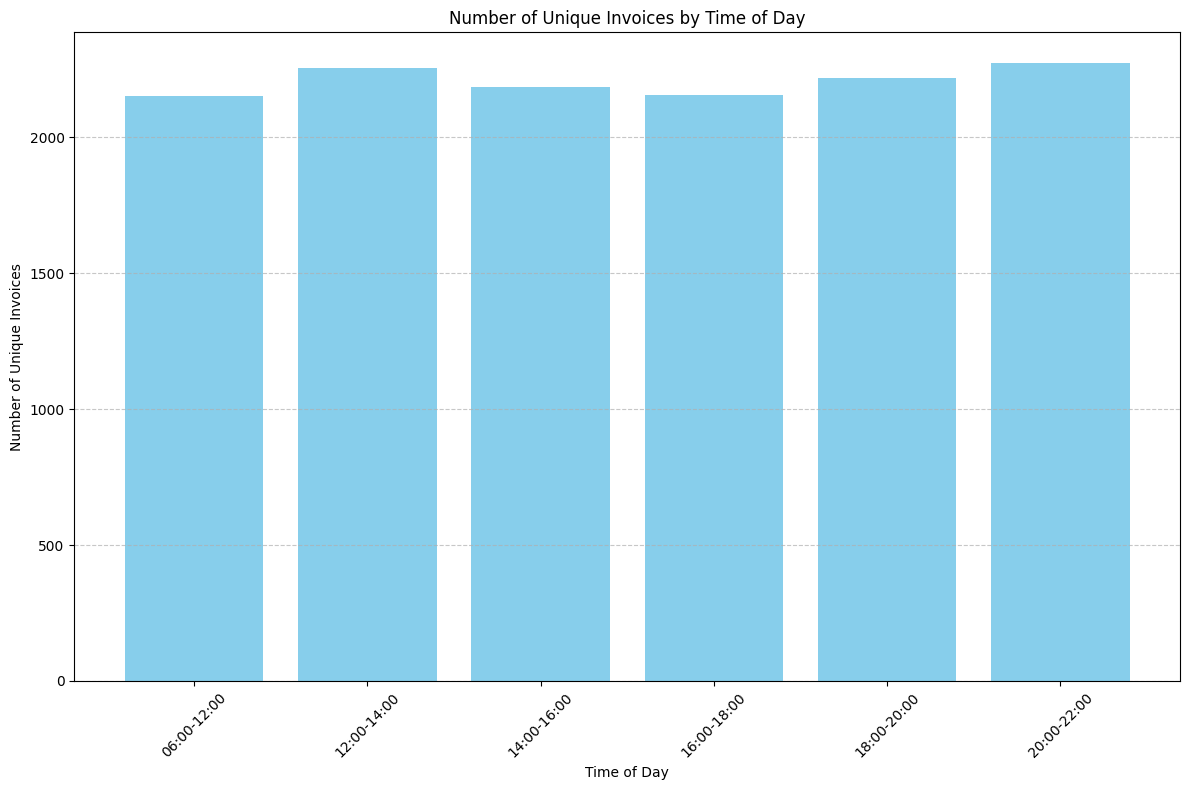

In [45]:
plt.figure(figsize=(12, 8))

plt.bar(invoice_counts['time_block'].astype(str)
, invoice_counts['receipt_number'], color='skyblue')

plt.title('Number of Unique Invoices by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Unique Invoices')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [46]:
data.year.unique()

array([2016, 2017, 2018, 2019])

10. What is correlation between item price and profit in 2018 and 2019

In [47]:
data_2018 = data[data['date'].dt.year == 2018]
correlation_2018 = data_2018['price'].corr(data_2018['profit_margin'])

In [48]:
data_2019 = data[data['date'].dt.year == 2019]
correlation_2019 = data_2019['price'].corr(data_2019['profit_margin'])

In [49]:
display(correlation_2018, correlation_2019)

0.7317219226361343

0.6957805758168217

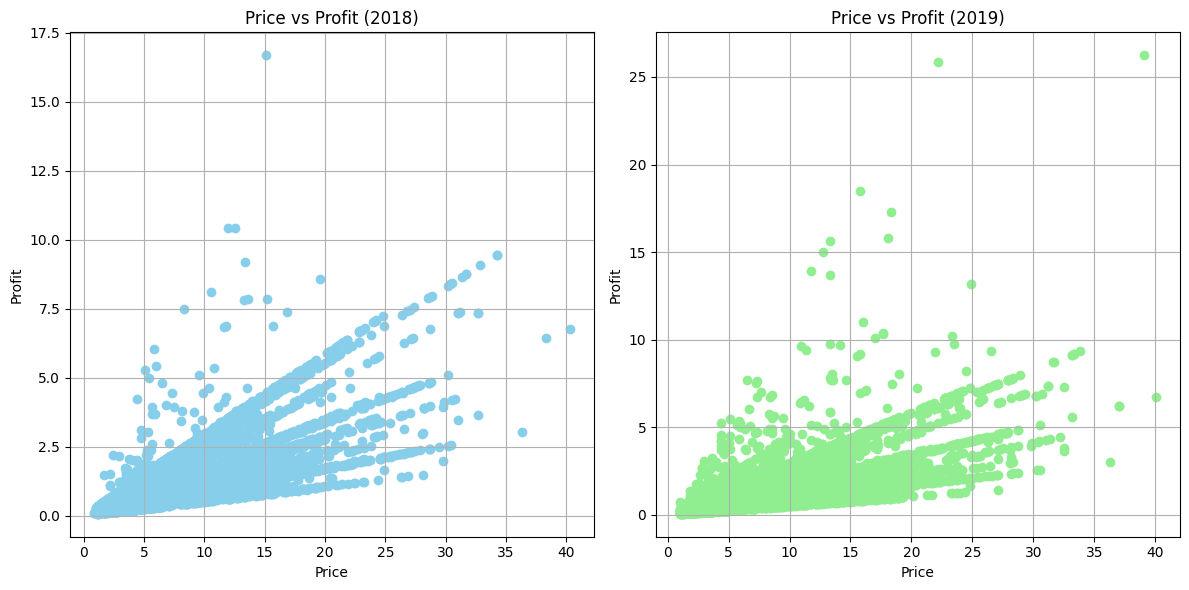

In [50]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_2018['price'], data_2018['profit_margin'], color='skyblue')
plt.title('Price vs Profit (2018)')
plt.xlabel('Price')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data_2019['price'], data_2019['profit_margin'], color='lightgreen')
plt.title('Price vs Profit (2019)')
plt.xlabel('Price')
plt.ylabel('Profit')
plt.grid(True)

plt.tight_layout()
plt.show();

Ho There is no significant difference in the mean profit margins between 2018 and 2019.

In [51]:
profit_2018 = data_2018['profit_margin']

mean_2018 = np.mean(profit_2018)
std_2018 = np.std(profit_2018, ddof=1)
n_2018 = len(profit_2018)

In [52]:
profit_2019 = data_2019['profit_margin']

mean_2019 = np.mean(profit_2019)
std_2019 = np.std(profit_2019, ddof=1)
n_2019 = len(profit_2019)

In [53]:
z_stat = (mean_2018 - mean_2019) / np.sqrt(
    (std_2018**2 / n_2018) + (std_2019**2 / n_2019))

p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))
alpha = 0.05

if p_value < alpha:
    print('There is a significant difference')
else:
    print('There is no significant difference')

There is a significant difference


В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх,
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно**

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql.

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga.
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**